Read about automatic differentation in "Machine Learning Defined" appendix B. You can find that online here
https://jermwatt.github.io/machine_learning_refined/notes/3_First_order_methods/3_5_Automatic.html
To make the module autograd available we use the following commands:

In [15]:
# import statement for autograd wrapped numpy
import autograd.numpy as np   
# import statment for gradient calculator
from autograd import grad  
import seaborn as sns

Then we can use the following generic code for doing the gradient descent:

In [3]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return cost_history

We now want to find the minimum of 
$$g(w)=\frac{1}{50}(w^4+w^2+10w)$$ using the above gradient descent. Make three separate runs using a step length of $\alpha$=1,0.01 and 0.01 starting from $w^0=2$. Plot the resulting cost histories. Which step length works best for this particular function and initial point ?

In [11]:
g = lambda w: (1/50)*(w**4+w**2+10*w)
w0=2.0

In [12]:
cost_history=gradient_descent(g,1,100,w0)

In [19]:
sns.set_theme()
sns.set(rc = {'figure.figsize':(15,8)})

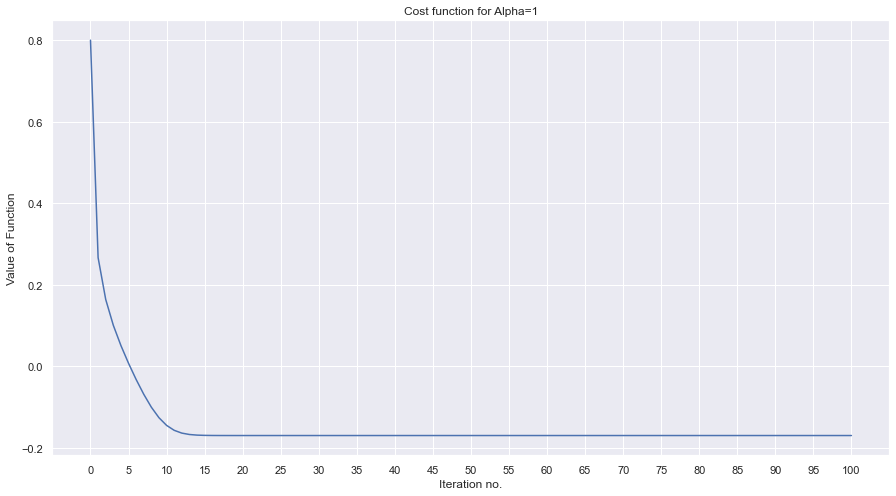

In [20]:

alpha_choice=1;
max_its=100
cost_history=gradient_descent(g,alpha_choice,max_its,w0)
p=sns.lineplot(y=cost_history,x=[i for i in range(max_its+1)])
_=p.set(title="Cost function for Alpha="+str(alpha_choice),ylabel="Value of Function",xlabel="Iteration no.",xticks=range(0,max_its+1,5))

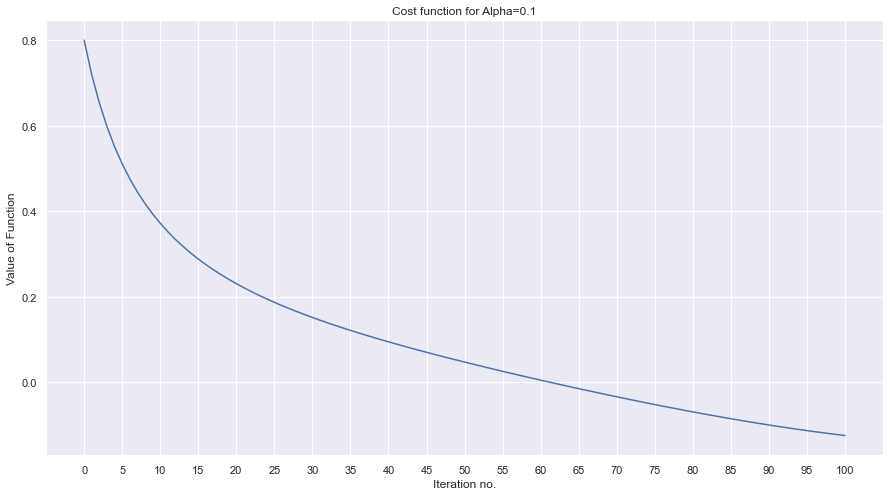

In [21]:

alpha_choice=0.1;
max_its=100
cost_history=gradient_descent(g,alpha_choice,max_its,w0)
p=sns.lineplot(y=cost_history,x=[i for i in range(max_its+1)])
_=p.set(title="Cost function for Alpha="+str(alpha_choice),ylabel="Value of Function",xlabel="Iteration no.",xticks=range(0,max_its+1,5))

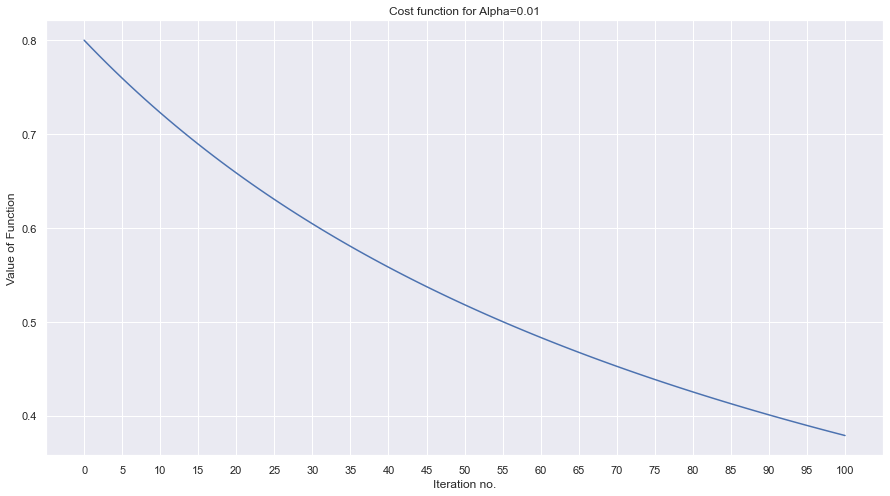

In [22]:

alpha_choice=0.01;
max_its=100
cost_history=gradient_descent(g,alpha_choice,max_its,w0)
p=sns.lineplot(y=cost_history,x=[i for i in range(max_its+1)])
_=p.set(title="Cost function for Alpha="+str(alpha_choice),ylabel="Value of Function",xlabel="Iteration no.",xticks=range(0,max_its+1,5))

The most appropriate step size is when alpha is equal to 1, as it reaches the lowest minimum of the 3 tested step sizes, as well as reaching it in the least number of steps.